# Job Description Notebook

The purpose of this project was to explore job postings for common tech fields. Although we certainly could expand the scraping we initially scraped for:
* Data Scientist
* Data Analyst
* Data Engineer
* Front End Developer
* Back End Developer
* Fullstack Developer

We scraped from numerous big tech cities including:
* San Francisco
* Denver
* New York
* Seattle
* Portland 

Our initial goal was to determine what the most important and desired skills, packages, tech, etc. were from each field. However, it developed into an interesting project in determining how different some of these fields are actually from each other.

The web scraping was done by Leo Walker (https://github.com/leowalker89).

### Imports

In [131]:
import pandas as pd
import src.my_nlp_lib as my_lib
import spacy
import numpy as np
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(12345)


### Load spacy
Spacy is similar to NLTK but a lot faster and I think it provides a lot better results. 

In [3]:
nlp = spacy.load('en')

### Load data into pandas

In [21]:
df = pd.read_csv("data/multi_job_info1.csv", header = 1, encoding = 'latin-1')

In [22]:
df.head(5)

,1,category,title,company,location,date,job_desc
0,2,data scientist,"Data Scientist,","Cybercoders,","san-diego,california,",11/7/17,Data Scientist If you are a Data Scientist wi...
1,3,data scientist,"Data Scientist Intern,","Cybercoders,","san-diego,california,",11/7/17,Data Scientist Intern If you are looking to s...
2,4,data scientist,"Data Scientist,","Tealium,","san-diego,california,",11/7/17,WHO WE ARETealium is the leader in real time ...
3,5,data scientist,"Data Scientist,","GDIT,","san-diego,california,",11/7/17,General Dynamics Health Solutions ARMA would ...
4,6,data scientist,"Senior Data Scientist,","Hookit,","san-diego,california,",11/7/17,Senior Data ScientistAt Hookit we help brands...


Alright the strings aren't the cleanest but for our purposes they look fine. There is a structure to the data, so lets shuffle it and view another section. 

In [23]:
shuffled_df = df.sample(frac = 1, random_state = 42)
shuffled_df.head(10)

,1,category,title,company,location,date,job_desc
1429,1431,back end developer,"Web Developer,","ISO International,","san-diego,california,",11/7/17,We are seeking a Web Developer to join our te...
231,233,data scientist,"Data Scientist - Marketing Cloud,","Oracle,","orlando,florida,",11/7/17,Designs develops and programs methods process...
2019,2021,full stack developer,"Web Developer,","Kelly,","orlando,florida,",11/7/17,Kelly Services is actively seeking a Full Sta...
297,299,data scientist,"Machine Learning Engineer / Data Scientist,","BetterCompany,","san-francisco,california,",11/7/17,BetterCompany is looking for a highly motivat...
2053,2055,full stack developer,"Full-Stack Web Developer; US Citizen,","CGS Staffing,","houston,texas,",11/7/17,We are looking for a Full Stack Developer to ...
298,300,data scientist,"Data Scientist - Contract,","Cybercoders,","san-francisco,california,",11/7/17,Data Scientist Contract Data Scientist 6 mont...
1837,1839,full stack developer,Senior Full Stack Software Development Enginee...,"Zillow,","seattle,washington,",11/7/17,About the roleFinding the right place to rent...
719,721,data analyst,"Data Analyst,","Silverspring,","san-diego,california,",11/7/17,Job Description Silver Spring Networks is loo...
70,72,data scientist,Cloud DATA SCIENTIST - Big Data Platform Team ...,"Oracle,","denver,colorado,",11/7/17,Provides direction and specialist knowledge i...
1483,1485,back end developer,"Principal Software Engineer - Backend,","Highspot,","seattle,washington,",11/7/17,We are a community of engineers working at th...


This reveals some more cleaning, we have some empty strings that must not have had a result in the scrape search query these returned title, company, location, job_desc for results.
Lets clean those and drop the first column. Lets also clean location and strip the commas where we can.

In [40]:
title_dropped= shuffled_df[shuffled_df['title'] != 'title'].drop('1', axis = 1)
title_dropped['location'] = title_dropped['location'].str.strip(',').str.replace(repl= ', ', pat = ',')
title_dropped['title'] = title_dropped['title'].str.strip(',')
title_dropped['company'] = title_dropped['company'].str.strip(',')
cleaned_df = title_dropped.copy()
label_dict = {'front end developer' : 0,
              'data scientist' : 4,
              'back end developer' : 2,
              'data analyst' : 3,
              'data engineer' : 1,
              'full stack developer' : 5}


cleaned_df['num_labels'] = cleaned_df['category'].map(label_dict)

In [41]:
cleaned_df.head(10)

,category,title,company,location,date,job_desc,num_labels
1429,back end developer,Web Developer,ISO International,"san-diego, california",11/7/17,We are seeking a Web Developer to join our te...,2
231,data scientist,Data Scientist - Marketing Cloud,Oracle,"orlando, florida",11/7/17,Designs develops and programs methods process...,4
2019,full stack developer,Web Developer,Kelly,"orlando, florida",11/7/17,Kelly Services is actively seeking a Full Sta...,5
297,data scientist,Machine Learning Engineer / Data Scientist,BetterCompany,"san-francisco, california",11/7/17,BetterCompany is looking for a highly motivat...,4
2053,full stack developer,Full-Stack Web Developer; US Citizen,CGS Staffing,"houston, texas",11/7/17,We are looking for a Full Stack Developer to ...,5
298,data scientist,Data Scientist - Contract,Cybercoders,"san-francisco, california",11/7/17,Data Scientist Contract Data Scientist 6 mont...,4
1837,full stack developer,Senior Full Stack Software Development Enginee...,Zillow,"seattle, washington",11/7/17,About the roleFinding the right place to rent...,5
719,data analyst,Data Analyst,Silverspring,"san-diego, california",11/7/17,Job Description Silver Spring Networks is loo...,3
70,data scientist,Cloud DATA SCIENTIST - Big Data Platform Team ...,Oracle,"denver, colorado",11/7/17,Provides direction and specialist knowledge i...,4
1483,back end developer,Principal Software Engineer - Backend,Highspot,"seattle, washington",11/7/17,We are a community of engineers working at th...,2


This looks a lot better, I'm happy with this. Given more time I'd like to strip the company name from the job description if it's there, but that will take some thinking. Instead I'll probably just make company names stop words later.





Now lets add all of the job descriptions to a corpus and the company names to a stop list, we will replace spaces with underscores, it won't catch all of them but hopefully it will get most.

In [26]:
corpus = list(cleaned_df['job_desc'])
companys_add_stoplist = list(cleaned_df['company'].str.lower())

The below function processes and clean each description in the corpus. It:
* Strips punctuation
* Removes unicode
* Runs the doc through spacy
* Lemmatizes and tokens all words
* Keeps only Adjectives, Adverbs, Nouns, Proper Nouns, and Verbs (may change later)
* Removes stop words and rejoins as strings.

I have already prebuilt the stop words based on iterations of this model. A common problem was removing a lot of equal opportunity employment requirements. Although certainly important not necessarily useful for this project.


In [27]:
clean_corpus = [my_lib.process_string(doc, stoplist = companys_add_stoplist) for doc in corpus]

Lets do a quick comparison of before and after:

Before:

In [28]:
corpus[42]

' Data Center Network Engineering ConsultantJob Summary The project scope will be to integrate a newly acquired company into our 2 main data center locations The job responsibilities will include working with network hardware vendors Telco Service Providersand client technology departments to provide a seamless transition of services for our new clientbase Job Functions Ability to alter device configuration for logical or physical changes to maintain service integrity Perform Routing Switching Network upgrades and configuration Coordinate with vendors and technology partners to insure proper physical layer connectivity Perform circuit turn up testing and handoff to operations team for acceptance Create and update as built documentation and Visio diagrams Implement configurations or compliance changes with HPNA NCM or NCS scripts Executes with quality while completing tasks on time and on budget Proactively engaged to identify opportunities and implement enhancements of data network Eng

After:

In [29]:
clean_corpus[42]

'center network engineering consultantjob summary project scope integrate newly acquire main datum center responsibility network hardware vendor telco providersand technology department seamless transition clientbase functions alter device configuration logical physical maintain integrity perform routing switching network upgrade configuration coordinate vendor technology insure proper physical layer connectivity perform circuit turn testing handoff operation acceptance create update documentation visio diagram implement configuration hpna ncm ncs script execute quality task budget proactively engage identify implement enhancement datum network engage implementation critical infrastructure platform theoperation small branch center campus datacenter level internal effectively communicate highly technical option operational project related assignment responsible overall network troubleshooting internal networkrequired skills center network engineering ccnp ccna certification equivalent s

Okay well that actually looks pretty good, it looks like we've captured the important words and gotten rid of the unimportant words, at least for our scenario. 

Great now lets copy it so that if while we are working with it we screw something up we don't have to clean it all over again. and then run it through a vectorizer. This vectorizer uses sklearns tfidfvectorizer or the countvectorizer depending on use case it then returns the vocabulary and the vectorizer for use in NMF. The NMF is simply sklearns NMF class

In [87]:

working_corpus = clean_corpus.copy()
vocabulary, vect_model = my_lib.build_text_vectorizer(working_corpus,
                             use_tfidf=True,
                             max_features=2000)
word_mat = vect_model.transform(working_corpus).toarray()

# Find latent topics using our NMF model.
factorizer = NMF(n_components=6, alpha=0.5, l1_ratio=0.1, verbose=0)
W = factorizer.fit_transform(word_mat)
H = factorizer.components_

To view the topics we can simply run a loop over the sorted arguments of the most influential features for each vector, then use those indexes to fetch the words from the vocab list.

In [145]:

for i, row in enumerate(H):
        num_words = np.argsort(row)[::-1][:50]
        print ('Topic', i)
        print (' '.join(vocabulary[num_words]), '\n')

Topic 0
web end developer javascript css html design development website user php application browser mobile responsive code html5 jquery ui ux css3 understanding framework content creative page knowledge project interface create angular cross designer technology strong develop marketing react bootstrap digital standard platform wordpress app graphic js need maintain compatibility photoshop 

Topic 1
datum hadoop engineer etl spark pipeline platform warehouse hive digital aws processing nosql python technology engineering tool source scala kafka cloud scale large implement infrastructure analytic sql database various modern redshift azure hbase scalable lake process ingestion architecture minimum architect set pig design streaming model governance store quality enable modeling 

Topic 2
software development application design technology java technical stack test agile engineer web develop architecture cloud code engineering framework developer testing api spring knowledge computer tool

Alright well this topics actually look pretty good. Based on this information I would hypothesize that:
* Topic 0 = Front End Developer
* Topic 1 = Data Engineer
* Topic 2 = Back End Developer
* Topic 3 = Data Analyst
* Topic 4 = Data Scientist
* Topic 5 = Full Stack (maybe, software programmer)

Lets create some labels and do some exploration.

In [89]:
labels = W.argmax(axis=1)
for i in range(0, W.shape[1]):
    print ("Topic {} contains {} documents.".format(i, np.sum(labels == i)))

Topic 0 contains 520 documents.
Topic 1 contains 185 documents.
Topic 2 contains 506 documents.
Topic 3 contains 469 documents.
Topic 4 contains 239 documents.
Topic 5 contains 115 documents.


In [90]:
real_labels = cleaned_df['num_labels'].ravel()

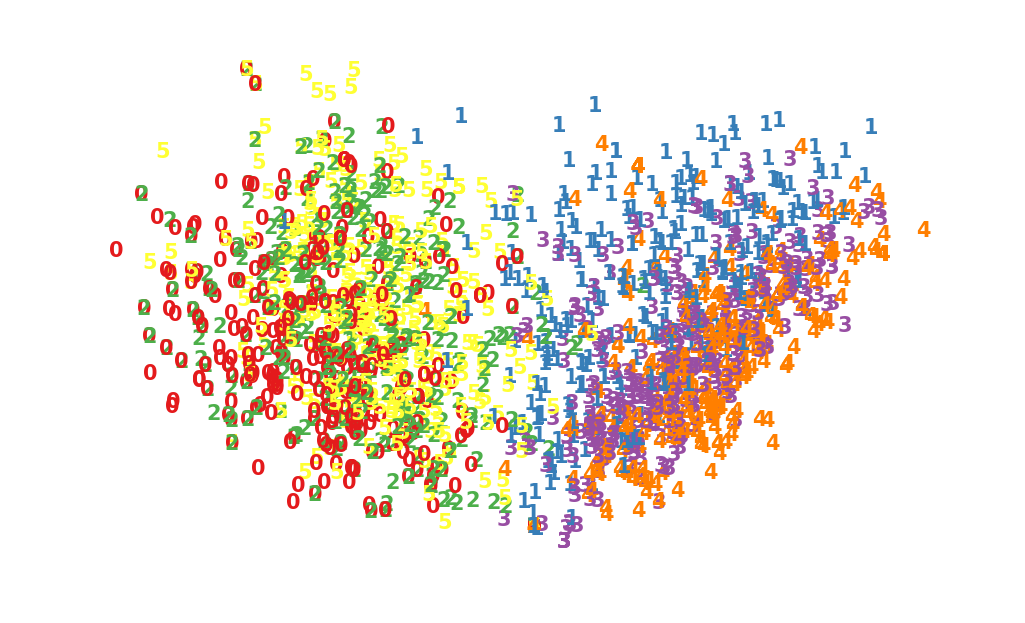

In [146]:
pca = PCA(n_components = 15)
transform_mat = pca.fit_transform(word_mat)
my_lib.plot_embedding(transform_mat, real_labels)
plt.savefig(fname='real_labels.png')
plt.show()

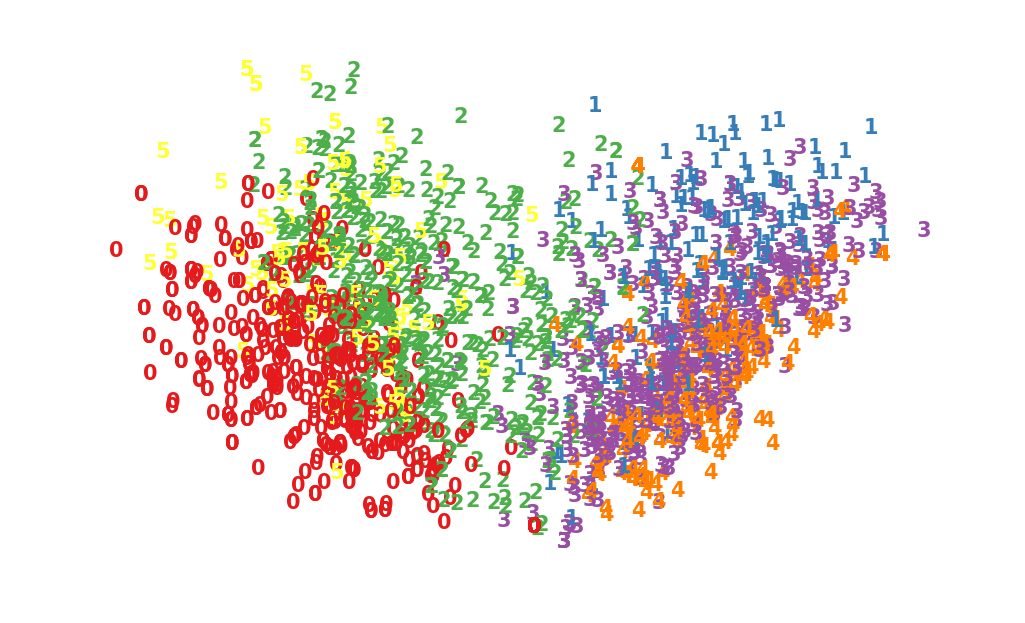

In [143]:
pca = PCA(n_components = 15)
transform_mat = pca.fit_transform(word_mat)
my_lib.plot_embedding(transform_mat, labels)
plt.savefig(fname='embedding.png')
plt.show()

This is interesting! First of all it appears that although we scraped an equal amounts of each job by classifier, topic modeling, suggests that there are clearly more people looking for web development jobs (either front end (0) or back end (2)). Based on the embedded PCA reduced plot, color aside, there is perhaps two groups. A left and a right group. Using the colors as categories this plot actually provides a lot of information. Assuming 0's and 2's are web developers, the left side of the plot appears to be more developer based. Similarly if I'm correct in hypothesizing that 5 is full stack, there is certainly a logical overlap. Looking at the 'data fields. We also see some interesting stuff. First off all of the data fields(1, 3, 4) are clustered on the right of the plot. This suggest there is certainly a difference in requested skills and descriptions between 'data' folk and 'web' folk. Further more it looks as if data science (4) is nested with analytics almost as if data science is a specialized subset of skills of data analytics, which once again is logical. The data engineers (1) are nested somewhere in between back end(2) and the data analyst/scientist (3,4) jobs. This once again is a somewhat logical conclusion. 

Comparing the actual labels and the predicted labels is somewhat interesting. First it appears although people might specify a web developer position, they really are looking for specific skill sets. This does not appear to be as true on the data side. One hypothesis is that in the data industry there are more transferable skills and people are not quite as specialized with specific languages or packages. 


In [18]:
# tsne = TSNE(verbose = 1)
# transform_mat = tsne.fit_transform(X)
# my_lib.plot_embedding(transform_mat, labels)
# plt.show()

TSNE showed a similar conclusion, but it is nowhere near as clear. 

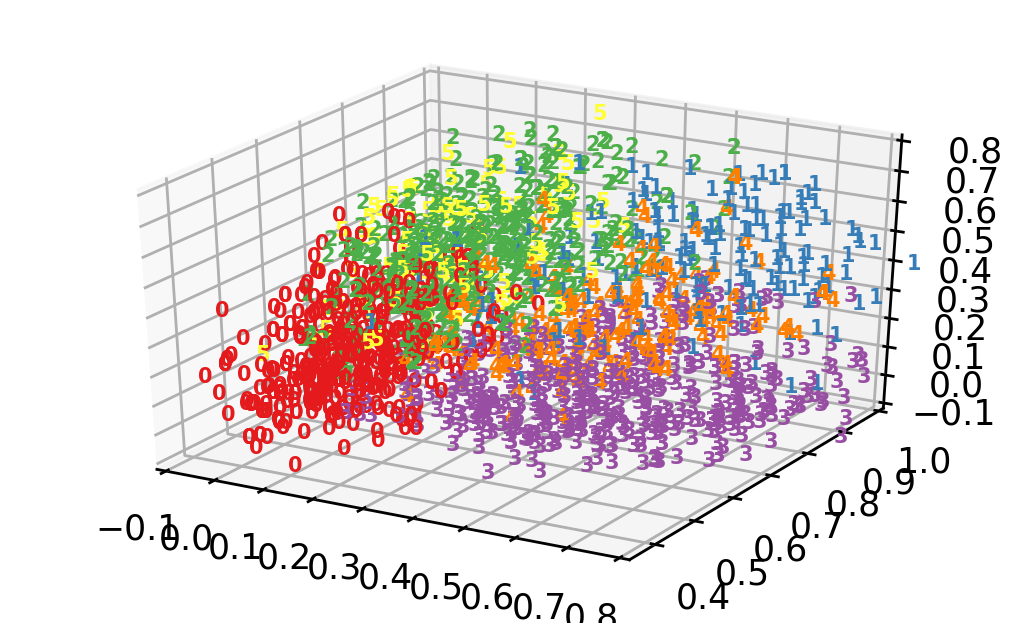

In [93]:
pca = PCA(n_components = 15)
transform_mat = pca.fit_transform(word_mat)
my_lib.plot_embedding3d(transform_mat, labels)
plt.savefig('image.png')
plt.show()

Adding a third component begins to separate the 1's, 4's and 3's, but not by much. This can be seen better in plotly representations in the attached file 'job_descriptions_label.html'. For whatever reason matplotlibs Set1 didn't show colors for 4 and 5 so I had to use a different colormap. 

In [140]:
import importlib
importlib.reload(my_lib)

<module 'src.my_nlp_lib' from '/Users/michaelmulder/Desktop/galvanize/projects/projects_for_github/job_posting_nlp_project/src/my_nlp_lib.py'>

In [141]:
my_lib.plot_embedding3dplotly(transform_mat, labels, filename = 'job_descriptions_label.html')

# this will take awhile to load

In [128]:
my_lib.plot_embedding3dplotly(transform_mat, real_labels, filename = 'job_descriptions_real_label.html')

# this will also take awhile to load

Now lets only view the data science jobs classified by the topic modeler I created.

In [94]:
mask = labels == 4
corpus_array = np.array(working_corpus)
ds_corpus = list(corpus_array[mask])
vocabulary_ds, vectorizer = my_lib.build_text_vectorizer(ds_corpus,
                             use_tfidf=True,
                             max_features=500)
word_mat_ds = vectorizer.transform(ds_corpus).toarray()

# Find latent topics using our NMF model.
factorizer_ds = NMF(n_components=3, alpha=0.5, l1_ratio=0.2, verbose=0)
new_W = factorizer_ds.fit_transform(word_mat_ds)
new_H = factorizer_ds.components_
new_labels = new_W.argmax(axis=1)

In [95]:
new_H.shape

(3, 500)

In [96]:
for i, row in enumerate(new_H):
        num_words = np.argsort(row)[::-1][:50]
        print ('Topic', i)
        print (' '.join(vocabulary_ds[num_words]), '\n')

Topic 0
datum machine science scientist learn learning model analytic develop analysis technology problem statistical development algorithm research advanced technique python engineering tool lead large design predictive knowledge insight technical project solve need modeling software process computer deep strong degree set engineer quantitative platform mining language sql analytics statistic field ml senior 

Topic 1
sale sales technical demonstration application write presentation demonstrate consultants anita filip exposure cloud principal communication development direction verbal complex mentor computer non knowledge need lead language software advanced tool region pre manipulation forecast implement sell contact individually linux routine develops numpy depth architect independently contributor activity specialization proficiency library travel 

Topic 2
marketing datum omc customization insight personalization cloud proficient analyze source tech engage experiment engineering t

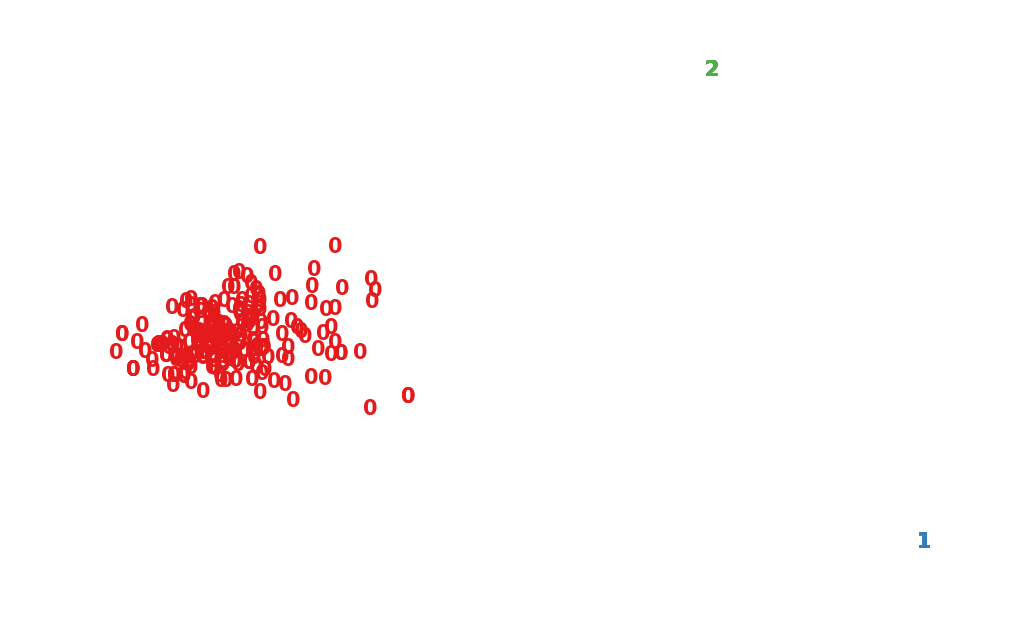

In [97]:
pca_ds = PCA(n_components = 15)
transform_mat_ds = pca_ds.fit_transform(word_mat_ds)
my_lib.plot_embedding(transform_mat_ds, new_labels)
plt.show()

Well this unfortunately looks like pretty bad embedding to me, my guess is there is either not enough data, or these items are all pretty similar.

## Web App

Below is the code I used to perform the functionality of the web app. Eventually I would like to add the ability to search for jobs using cosin similarity or knn in the embedding space.  

Below is a test string based off an old resume.


In [113]:
test_string = '''SELECT PROJECTS
Image Captioning for Augmented Reality Sales — Walmart Data https://github.com/mhmulder/picture_captioning_capstone
● Scraped web data in order to create an image captioning net that could be used to make sales recommendations based o  of an image
● Tech Used: CNN, LSTM, AWS (Cloud), Keras, NLP, Image classification, Python Analyzing Churn for a Ride Sharing Company— Galvanize
https://github.com/mhmulder/churn_study
● Modeled churn data using a gradient boosting classifier to make predictions and give recommendations for a major ride sharing company
● Tech Used: Gradient Boosting, Gridsearch, Scikit Learn, Seaborn, Python Using Statistical Methods to Create Best In Class Medical
Products — Next Frontier Biosciences https://dspace.library.colostate.edu/handle/10217/180351
● Utilized Design of Experiment and regression analysis to optimize properties in drug development
● Tech Used: JMP, Excel SELECT EXPERIENCE
Next Frontier Biosciences, CO — Formulation Scientist | Consultant June 2016 - December 2017
● Designed multi-million dollar manufacturing models spanning 8 year forecasts
● Researched, developed and manufactured 18 products from idea to launch
Focused Labs Oils, CO — Associate January 2016 - May 2016
● Projected a $300,000 increase in profits based on computational modeling in ASPEN, Minitab, Excel and Matlab
● Recommended 4 major process changes resulting in a 152% projected increase in ROI with their current extractor and a 283% increase in ROI for a modified extractor
Phillips 66 Center for Innovation Lab at CU, CO — Researcher January 2015 - May 2015
● Innovated and analyzed future energy saving gas separation devices
E. Pira-Chiara Boschis Winery, Piedmont, Italy — Winery Assistant
2013 Harvest
● Experienced first-hand international marketing, sales and culture EDUCATION
Galvanize Inc., CO — Data Science Immersive
● Applied various data science techniques to business cases with real data
● Specialized in regression, neural nets, and Bayesian statistics
● Independently took on additional courses through Coursera including
Andrew Ng’s deep learning and neural nets course
University of Colorado, CO — B.S. Chemical Engineering | B.A. Economics — GPA 3.61/4.00
● Built a strong foundation in statistics and calculus while applying econometrics and applied mathematics to engineering problems
● Developed a passion for learning, especially in predictive modeling SKILLS
Technical Languages
● Python, SQL, MATLAB
● Mild experience in: R, VBA
Analytical Skills
● Regression, Random Forest, Neural Nets, Gradient Boosting, Design of Experiment, Visualization, SVM, Machine Learning, NLP, AWS
Select Technical Skills
● Product Development, Scale Up, Manufacturing, Paired Programming, Leadership, Economic Analysis
Select Software Packages / Libraries
● PostgreSQL, JMP, Minitab, Aspen, Mathematica, Polymath, Microsoft Project, Microsoft Visio'''

Lets clean the string using the process string function from my library.

In [115]:
clean_string = my_lib.process_string(test_string, stoplist = companys_add_stoplist)

Use the original vectorizer to vectorize my resume to determine which topic it belongs in.

In [116]:
wa_word_mat = vect_model.transform([clean_string]).toarray()

In [117]:
wa_new_W = factorizer.transform(wa_word_mat)
wa_new_H = factorizer.components_
wa_labels = wa_new_W.argmax(axis=1)

Well lets figure out what my topic my resume suggests:

In [119]:
wa_labels[0]

4

4 was the label for data science before so I guess thats good news! Just as a reminder lets print the top 100 key words from each field

In [120]:
for i, row in enumerate(wa_new_H):
        num_words = np.argsort(row)[::-1][:100]
        print ('Topic', i)
        print (' '.join(vocabulary[num_words]), '\n')
        

Topic 0
web end developer javascript css html design development website user php application browser mobile responsive code html5 jquery ui ux css3 understanding framework content creative page knowledge project interface create angular cross designer technology strong develop marketing react bootstrap digital standard platform wordpress app graphic js need maintain compatibility photoshop stack brand usability api sass implement commerce mysql write proficient ajax interactive git email cms tool seek plus management adobe library modern server coding collaborate testing required json practice update senior ecommerce ruby seo magento technical agency dynamic cod dice language quality feature skills reusable follow node closely deep version 

Topic 1
datum hadoop engineer etl spark pipeline platform warehouse hive digital aws processing nosql python technology engineering tool source scala kafka cloud scale large implement infrastructure analytic sql database various modern redshift az

Below is an example of how the web app script finds the missing words!

In [121]:
DS_sorted_words = np.argsort(wa_new_H[4])[::-1][:100]

In [122]:
DS_vocab = vocabulary[DS_sorted_words]
DS_set = set(DS_vocab)

In [123]:
my_set = set(clean_test.split(' '))

In [124]:
missing_words = []

for word in DS_set:
    if word not in my_set:
        missing_words.append(word)
        
print ('These are your missing words: {}'.format(' '.join(missing_words)))

These are your missing words: statistics small algorithm target phd physics source quantitative mining mathematics mentor ph identify dataset processing actionable optimization question united math characteristic demonstration innovative expert area language implement ml behavior senior omc structured field sas unstructured states analytic advanced method insight ai tensorflow tool relate personalization organization need mission research leverage complex natural set lead scala degree space analytics decision spark feature computer solve artificial large mathematical technology


## Below are other scripts I used to create visualizations for my readme, not much other interesting stuff downhere